# 3. NumPy

## 3.1. Создание массивов NumPy

NumPy — это библиотека Python для работы с многомерными массивами и математическими операциями.  
✅ Быстрее списков Python  
✅ Все элементы одного типа  
✅ Используется в Pandas и scikit-learn  

Основной объект — `ndarray`
```python
import numpy as np
arr = np.array([1, 2, 3])  # Создаём массив из списка
print(arr)  # [1 2 3]

# Пример проверки типа
print(arr.dtype)  # int64
```

Параметры создания массива  
```python
arr = np.array([[1, 2], [3, 4]], dtype=float, order='F')
```
- dtype — тип данных (например, int, float, bool).
- order — порядок хранения в памяти:
  - С-порядок (order='C'): данные хранятся построчно.
  - F-порядок (order='F'): данные хранятся по столбцам.
- ndmin — минимальное количество измерений.

NumPy поддерживает разные типы:
- Числовые: int32, float64, complex128
- Строковые: string_, unicode_
- Логические: bool_
- Объекты Python: object_

Специальные массивы  
```python
# Нулевой массив:
zeros = np.zeros(3)  # [0. 0. 0.]

# Массив из единиц:
ones = np.ones((2, 2))  # [[1. 1.], [1. 1.]]

# Единичная матрица:
eye = np.eye(3)  # Матрица 3x3 с единицами на диагонали

# Неинициализированный массив:
empty = np.empty(2)  # Случайные значения (быстрое создание)
```

In [1]:
import numpy as np
arr = np.array([[1, 2], [3, 4]], dtype='float32')
print(f" массив - {arr}, тип - {arr.dtype}")

 массив - [[1. 2.]
 [3. 4.]], тип - float32


## 3.2. Обращение к элементам массива

✅ Для одномерных массивов индексация как в списках.  
✅ В многомерных массивах используйте запятые: `[строка, столбец]`.  
✅ `:` выбирает все элементы вдоль оси.  
✅ `.copy()` создаёт независимую копию  

In [2]:
import numpy as np
a = np.array([1., 4., 5., 8.])

# Доступ к элементам одномерного массива
# Элемент с индексом 3
print(a[3])
print(a[::2])  # Каждый второй элемент

# Изменение элемента
a[3] = 9.
print(a)

8.0
[1. 5.]
[1. 4. 5. 9.]


In [3]:
# Многомерные массивы (матрицы)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]], dtype=float)
# Элемент в первой строке, втором столбце
print(matrix[0, 1])
print(matrix[1, :])  # Вторая строка
print(matrix[:, 2])  # Третий столбец

2.0
[4. 5. 6.]
[3. 6.]


Прямое присваивание (=) создаёт ссылку, а не копию. Для копирования используйте .copy():

In [4]:
a = np.array([1, 2, 3], float)
b = a       # Ссылка на тот же массив
c = a.copy()  # Независимая копия

print(a is b, a is c)
print(a == c)

True False
[ True  True  True]


## 3.3. Получение краткой информации о массиве

Основные свойства массивов

| Свойство/Метод | Описание | Пример |
| - | - | - |
| `array.shape` | Размеры по осям | (2, 3) |
| `array.size` | Общее число элементов | 6 |
| `array.ndim` | Количество измерений | 2 |
| `len(array)` | Длина по первой оси | 2 |
| `array.dtype` | Тип данных | int64 |
| `array.nbytes` | Память в байтах | 48 |
| `value in array` | Проверка наличия значения | True/False |

In [5]:
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6]])

# размеры массива по каждому измерению в виде кортежа.
print(f"shape - {arr.shape}")

# общее число элементов в массиве.
print(f"size - {arr.size}")

# количество осей (измерений) массива.
print(f"ndim - {arr.ndim}")

# Проверяет, содержится ли значение в массиве.
print(2 in arr) 

shape - (2, 3)
size - 6
ndim - 2
True


In [6]:
# Проверка памяти
float_arr = np.array([1.1, 2.2], dtype='float32')
print(float_arr.nbytes)

8


Важные нюансы
- `shape`, `size`, `ndim` — это свойства, а не методы (скобки не нужны).
- `len()` работает только по первой оси, для общего числа элементов используйте `size`.
- `in` проверяет значения, а не индексы.

## 3.4. Изменение формы массива

`reshape` превращает массив в новую форму без изменения данных.  
✅ Сохраняет общее количество элементов  
✅ Можно использовать функцию `np.reshape()` или метод `.reshape()`

In [7]:
import numpy as np

# Создаем одномерный массив
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)

# Меняем форму на 5x2
arr_2d = arr.reshape((5, 2))
print(arr_2d)

# Можно вернуть обратно в 1D
arr_flat = arr_2d.reshape(10)
print(arr_flat)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Меняет строки и столбцы местами - Транспонирование (T или transpose())

In [8]:
matrix = np.array([[0, 1, 2], [3, 4, 5]])
matrix_T = matrix.T

print(matrix, matrix_T, sep='\n\n')

[[0 1 2]
 [3 4 5]]

[[0 3]
 [1 4]
 [2 5]]


In [9]:
a = np.array([[1, 2], [3, 4]])

# flatten (копия) создает копию данных (безопасно, но медленнее)
flat = a.flatten()
flat[0] = 100  # Исходный массив НЕ изменится

# ravel (ссылка)  возвращает ссылку (быстрее, но изменения влияют на исходный массив)
raveled = a.ravel()
raveled[0] = 100  # Изменится и исходный массив

## 3.5. Конкатенация массивов

`np.concatenate()` - Объединяет массивы вдоль указанной оси(`axis=0` — по умолчанию)

In [10]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [11]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Вертикальное объединение (vstack/row_stack)
print(np.vstack((a, b)))
print("---")
# или
print(np.concatenate((a.reshape(1,3), b.reshape(1,3)), axis=0))
print("---")

# Горизонтальное объединение (hstack)
print(np.hstack((a, b)))
print("---")

# Объединение в столбцы (column_stack)
print(np.column_stack((a, b)))

[[1 2 3]
 [4 5 6]]
---
[[1 2 3]
 [4 5 6]]
---
[1 2 3 4 5 6]
---
[[1 4]
 [2 5]
 [3 6]]


⚠️ Важные нюансы
1. Для axis=0 массивы должны иметь одинаковое количество столбцов. Для axis=1 — одинаковое количество строк
2. Конкатенация всегда создает новый массив.
3. Для частых операций лучше использовать np.empty() с последующим заполнением.

In [12]:
# Два изображения 100x100 пикселей
img1 = np.random.rand(100, 100)
img2 = np.random.rand(100, 100)

# Вертикальный коллаж
collage = np.vstack((img1, img2))  # 200x100

print(collage)

[[0.13126116 0.25193781 0.11214494 ... 0.40357608 0.86744503 0.7667416 ]
 [0.68301249 0.61078901 0.74256669 ... 0.26176182 0.40556872 0.95447411]
 [0.69934713 0.23882611 0.8740927  ... 0.09256812 0.94534191 0.79735483]
 ...
 [0.39245754 0.61428175 0.28062775 ... 0.39881711 0.29337322 0.04541298]
 [0.57430277 0.32782424 0.70026746 ... 0.01088816 0.0258965  0.98310276]
 [0.85428023 0.91831    0.01115886 ... 0.27494993 0.20232654 0.00336878]]


## 3.6. Функции математических операций, знакомство с правилами транслирования

In [13]:
# Все арифметические операции выполняются поэлементно
a = np.array([1, 2, 3], float)
b = np.array([5, 2, 6], float)

print(f"сложение - {a + b}")
print(f"умножение - {a * b}")
print(f"возведение в степень - {b ** a}")
print()

# Для матриц умножение остается поэлементным (не матричным!)
A = np.array([[1, 2], [3, 4]])
B = np.array([[2, 0], [1, 3]])
print(A * B)

сложение - [6. 4. 9.]
умножение - [ 5.  4. 18.]
возведение в степень - [  5.   4. 216.]

[[ 2  0]
 [ 3 12]]


NumPy автоматически "растягивает" массивы разной формы при операциях.
- Добавляет единицы слева к меньшей размерности
- Растягивает размерности, равные 1
- Если размеры не совпадают и ни один не равен 1 → ошибкa

In [14]:
# Матрица 3x2 + вектор длины 2
# b автоматически превращается в [[-1,3], [-1,3], [-1,3]]
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([-1, 3])
print(A + b) 

[[0 5]
 [2 7]
 [4 9]]


NumPy предоставляет векторные версии математических функций
```python
a = np.array([1, 4, 9])
print(np.sqrt(a))  # [1. 2. 3.] - квадратный корень
print(np.exp(a))   # [2.718, 54.598, 8103.084] - экспонента

# Округление
a = np.array([1.1, 1.5, 1.9])
print(np.rint(a))  # [1. 2. 2.] - к ближайшему
print(np.ceil(a))  # [2. 2. 2.] - вверх
print(np.floor(a)) # [1. 1. 1.] - вниз

# Округление
print(np.pi)  # 3.141592653589793
print(np.e)   # 2.718281828459045

# Статистические операции
a = np.array([2, 1, 9])
print(a.sum())   # 12 - сумма
print(a.mean())  # 4.0 - среднее
print(a.std())   # 3.559 - стандартное отклонение

# По осям (для матриц)
A = np.array([[0, 2], [3, -1], [3, 5]])
print(A.mean(axis=0))  # [2. 2.] - по столбцам
print(A.mean(axis=1))  # [1. 1. 4.] - по строкам

# Индексы экстремумов
print(np.argmin(a))  # 1 (индекс минимального)
print(np.argmax(a))  # 2 (индекс максимального)
```

## 3.7. Обработка пропусков

В NumPy пропущенные значения обозначаются как np.nan (Not a Number).

Специальные функции с префиксом nan автоматически пропускают NaN
```python
import numpy as np

data = np.array([[np.nan, 2, 4], 
                 [9, 2, np.nan]], dtype=float)

print(np.nanmean(data))       # 4.25 (среднее)
print(np.nanmedian(data))     # 3.0 (медиана)
print(np.nansum(data))        # 17.0 (сумма)

print(np.nanmean(data, axis=0))  # [9. 2. 4.] (по столбцам)
print(np.nanmean(data, axis=1))  # [3. 5.5] (по строкам)
```

`np.isnan()` — поиск пропусков (возвращает булев массив)  
`np.count_nonzero(np.isnan(data))` — подсчет пропусков

Замена пропущенных значений

In [11]:
data = np.array([[np.nan, 2, 4], 
                 [9, 2, np.nan]], dtype=float)
print(f'Матрица с пустыми \n {data}')
print()

# Вариант 1: Единое значение для всех пропусков
filled_data = np.nan_to_num(data, nan=0)  # Замена на 0
print(f'Единое значение для всех пропусков \n {filled_data}')
print()

# Вариант 2: Разные значения по столбцам/строкам
col_replace = {0: 5, 1: 6, 2: 7}
for col in range(data.shape[1]):
    data[:, col] = np.nan_to_num(data[:, col], nan=col_replace[col])
print(f'Разные значения по столбцам/строкам \n {data}')
print()

data = np.array([[np.nan, 2, 4], 
                 [9, 2, np.nan]], dtype=float)

# Вариант 3: Заполнение статистиками
col_means = np.nanmean(data, axis=0)  # Средние по столбцам
for col in range(data.shape[1]):
    data[:, col] = np.nan_to_num(data[:, col], nan=col_means[col])
print(f'Заполнение статистиками \n {data}')

Матрица с пустыми 
 [[nan  2.  4.]
 [ 9.  2. nan]]

Единое значение для всех пропусков 
 [[0. 2. 4.]
 [9. 2. 0.]]

Разные значения по столбцам/строкам 
 [[5. 2. 4.]
 [9. 2. 7.]]

Заполнение статистиками 
 [[9. 2. 4.]
 [9. 2. 4.]]


```Python
# Удаление строк с пропусками
clean_data = data[~np.isnan(data).any(axis=1)]
```

## 3.8. Функция np.linspace()

создает одномерный массив с равномерно распределенными числами в заданном интервале.

```Python
np.linspace(start, stop, num=50, endpoint=True)
```
**start** — начальное значение (включено)  
**stop** — конечное значение (включено, если endpoint=True)  
**num** — количество точек (по умолчанию 50)  
**endpoint** — включает ли конечное значение (по умолчанию True)  

In [14]:
# Исключение конечной точки
arr = np.linspace(0, 1, 5, endpoint=False)
print(arr)

[0.  0.2 0.4 0.6 0.8]


Сравнение с `np.arange()`
| Характеристика | np.linspace() | np.arange() |
| - | - | - |
| Управление | Числом точек | Шагом |
| Гарантии | Точно включает границы | Может не включать |
| Применение | Когда важно количество точек | Когда важен шаг |

In [15]:
# linspace - 5 точек между 0 и 1
print(np.linspace(0, 1, 5))

# arange - с шагом 0.25
print(np.arange(0, 1.25, 0.25))

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]


## 3.9. Функция np.logspace()

создает одномерный массив чисел, равномерно распределенных в логарифмической шкале между `base^start` и `base^stop`.
```Python
np.logspace(start, stop, num=50, endpoint=True, base=10.0)
```
**start** — показатель степени для начального значения (base^start)  
**stop** — показатель степени для конечного значения (base^stop)  
**num** — количество точек (по умолчанию 50)  
**endpoint** — включает ли конечное значение (по умолчанию True)  
**base** — основание логарифмической шкалы (по умолчанию 10)  

In [16]:
# С другим основанием
# 5 точек между 2⁻² (0.25) и 2² (4) с основанием 2
arr = np.logspace(-2, 2, 5, base=2)
print(arr)

[0.25 0.5  1.   2.   4.  ]


Сравнение с `np.linspace()`
| Характеристика | np.logspace() | np.linspace() |
| - | - | - |
| Шкала | Логарифмическая | Линейная |
| Параметры | Показатели степени (base^start) | Прямые значения |
| Применение | Экспоненциальные зависимости | Линейные зависимости |

In [18]:
log_arr = np.logspace(1, 3, 3)
lin_arr = 10 ** np.linspace(1, 3, 3)

print(log_arr, lin_arr, sep='\n')

[  10.  100. 1000.]
[  10.  100. 1000.]


## 3.10. Функция np.digitize()

определяет, в какой числовой интервал (бин) попадает каждое значение массива, и возвращает соответствующие индексы интервалов.
```Python
np.digitize(x, bins, right=False)
```
**x** — входной массив значений  
**bins** — массив границ интервалов (должен быть отсортирован по возрастанию)  
**right** — какой край интервала считать включенным (по умолчанию False)  

In [4]:
import numpy as np

values = np.array([3, 9, 15], float)
bins = [3, 9, 15]

print(np.digitize(values, bins, right=True))
# 3 ∈ (-∞,3] → индекс 0
# 9 ∈ (3,9] → индекс 1
# 15 ∈ (9,15] → индекс 2

[0 1 2]


In [3]:
# Практическое применение — биннинг данных
ages = np.array([12, 25, 32, 47, 55, 63])
age_bins = [20, 40, 60]  # Границы возрастных групп

# Определяем возрастные группы
groups = np.digitize(ages, age_bins)
print(groups)

[0 1 1 2 2 3]


Альтернативы  
`pd.cut()` в Pandas — более гибкий инструмент для биннинга  
`np.histogram()` — если нужно сразу подсчитать количество элементов в бинах  

Биннинг признаков для линейной модели

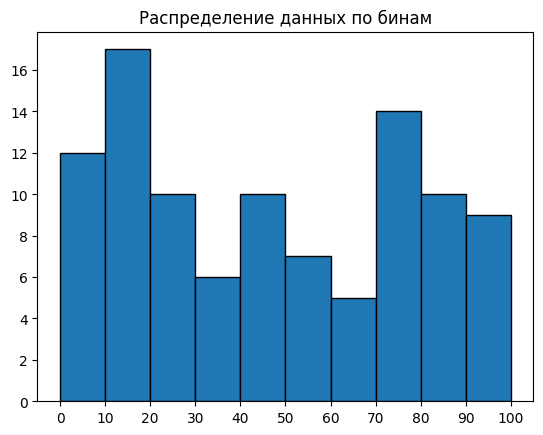

In [5]:
import matplotlib.pyplot as plt
# Исходные данные
X = np.random.uniform(0, 100, 100)

# Создаем бины
bins = np.linspace(0, 100, 11)  # 10 интервалов

plt.hist(X, bins=bins, edgecolor='black')
plt.xticks(bins)
plt.title("Распределение данных по бинам")
plt.show()

## 3.11. Функция np.searchsorted()

находит позиции, куда нужно вставить элементы, чтобы сохранить порядок сортировки массива.

Это полезно для:
- Быстрой вставки элементов в отсортированный массив
- Поиска границ интервалов
- Анализа распределения данных

```python
np.searchsorted(arr, v, side='left', sorter=None)
```
**arr** — исходный массив (должен быть отсортирован, если не указан sorter)  
**v** — значения для поиска позиций вставки  
**side** — `'left'` или `'right'` (какую сторону интервала учитывать)  
**sorter** — индексы для сортировки, если массив не отсортирован  

In [7]:
# Работа с несколькими значениями
arr = np.array([4, 10, 12, 14, 16, 16, 59, 72, 78, 86])

values = np.array([5, 15, 85])
positions = np.searchsorted(arr, values)
print(f'Куда вставить, чтобы сохранить порядок? {positions}')

Куда вставить, чтобы сохранить порядок? [1 4 9]


In [8]:
print(np.searchsorted(arr, 16, side='left'))  # 4 (первое вхождение)
print(np.searchsorted(arr, 16, side='right')) # 6 (после последнего вхождения)

4
6


Сравнение с аналогичными функциями

| Функция | Отсортированные данные | Возвращает | Основное применение |
| - | - | - | - |
| `searchsorted` | Да | Индексы вставки | Работа с упорядоченными данными |
| `digitize` | Нет | Номера бинов | Биннинг данных |
| `where` | Нет | Индексы элементов | Поиск точных совпадений |

## 3.13. Функция np.app ly_along_axis()

In [9]:
81

81